In [36]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [37]:
df = pd.read_csv('../data/MentalHealthSurvey.csv')

In [38]:
df.columns

Index(['gender', 'age', 'university', 'degree_level', 'degree_major',
       'academic_year', 'cgpa', 'residential_status', 'campus_discrimination',
       'sports_engagement', 'average_sleep', 'study_satisfaction',
       'academic_workload ', 'academic_pressure', 'financial_concerns',
       'social_relationships', 'depression', 'anxiety', 'isolation',
       'future_insecurity', 'stress_relief_activities'],
      dtype='object')

- nominal: gender, university, degree_major, residential_status, campus_discrimination
- numerical: age
- ordinal: everything else

In [39]:
ordinal = [
    'degree_level', 'degree_major', 'future_insecurity',
    'academic_year', 'cgpa', 'residential_status', 'campus_discrimination',
    'sports_engagement', 'average_sleep', 'study_satisfaction',
    'academic_workload ', 'academic_pressure', 'financial_concerns',
    'social_relationships', 'depression', 'anxiety', 'isolation',
]
categoricals = dict()
reassign = dict()
for column in ordinal:
    categoricals[column] = pd.Categorical(df[column])
    reassign[column] = categoricals[column].codes

In [40]:
df_encoded = df.assign(**reassign).drop(columns='stress_relief_activities')
df_encoded = pd.get_dummies(df_encoded, columns=['gender', 'degree_major', 'residential_status', 'campus_discrimination', 'university'])

In [41]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      87 non-null     int64
 1   degree_level             87 non-null     int8 
 2   academic_year            87 non-null     int8 
 3   cgpa                     87 non-null     int8 
 4   sports_engagement        87 non-null     int8 
 5   average_sleep            87 non-null     int8 
 6   study_satisfaction       87 non-null     int8 
 7   academic_workload        87 non-null     int8 
 8   academic_pressure        87 non-null     int8 
 9   financial_concerns       87 non-null     int8 
 10  social_relationships     87 non-null     int8 
 11  depression               87 non-null     int8 
 12  anxiety                  87 non-null     int8 
 13  isolation                87 non-null     int8 
 14  future_insecurity        87 non-null     int8 
 15  gender_F

In [42]:
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

In [43]:
kmeans = KMeans(n_clusters=3, random_state=42)
df2 = df.copy()
df2['cluster'] = kmeans.fit_predict(df_normalized)
df_encoded['cluster'] = kmeans.fit_predict(df_normalized)

In [9]:
df.cluster.unique()

array([2, 1, 0], dtype=int32)

In [27]:
df.cluster.value_counts()

cluster
2    38
1    28
0    21
Name: count, dtype: int64

In [10]:
df[df.cluster == 0].describe()

,age,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,cluster
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.0
mean,18.523810,3.380952,3.952381,4.095238,3.714286,2.476190,3.809524,3.714286,4.142857,3.095238,0.0
std,0.980767,1.244033,0.740013,0.995227,1.454058,1.209093,0.872872,0.783764,1.062342,1.480026,0.0
min,17.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.0
25%,18.000000,3.000000,3.000000,4.000000,3.000000,2.000000,3.000000,3.000000,4.000000,2.000000,0.0
50%,18.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,3.000000,0.0
75%,19.000000,4.000000,4.000000,5.000000,5.000000,3.000000,4.000000,4.000000,5.000000,5.000000,0.0
max,20.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.0


<Axes: xlabel='cpga'>

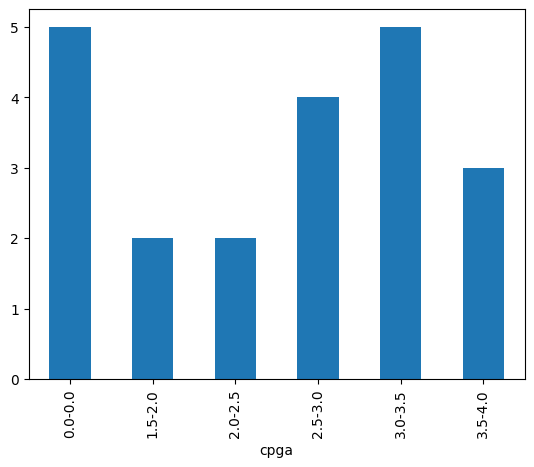

In [21]:
df['cpga'] = pd.Categorical(df['cgpa'], categories=['0.0-0.0', '1.5-2.0', '2.0-2.5', '2.5-3.0', '3.0-3.5', '3.5-4.0'], ordered=True)
df[df.cluster == 0]['cpga'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='cpga'>

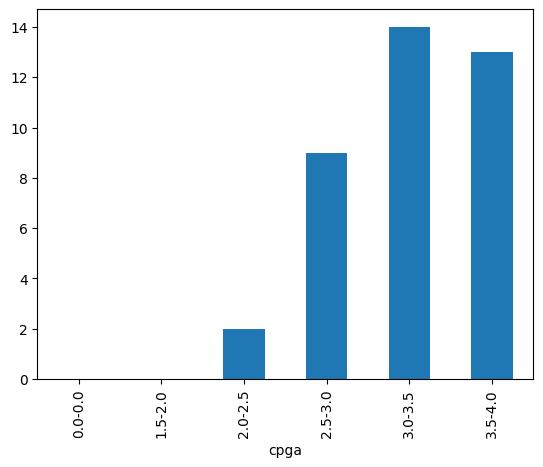

In [23]:
df[df.cluster == 2]['cpga'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='cpga'>

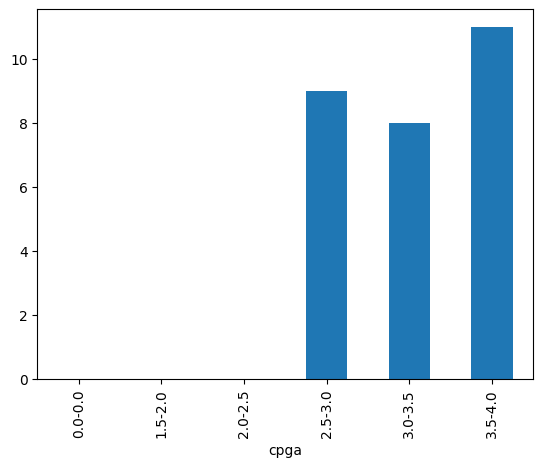

In [22]:
df[df.cluster == 1]['cpga'].value_counts().sort_index().plot(kind='bar')

In [44]:
categoricals = dict()
reassign = dict()
for column in df.columns[2:-1]:
    categoricals[column] = pd.Categorical(df[column])
    reassign[column] = categoricals[column].codes

In [45]:
df = df.assign(**reassign)

In [46]:
df

,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,...,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities,column
0,0,20,4,1,1,1,4,0,0,3,...,2,4,3,2,1,0,0,1,16,16
1,0,20,5,0,0,2,4,0,0,0,...,2,3,0,2,2,2,2,3,4,4
2,0,20,1,1,0,2,3,0,0,0,...,3,4,2,3,1,2,2,0,22,22
3,0,20,5,1,0,2,3,1,0,3,...,3,3,3,0,4,4,4,2,4,4
4,1,20,5,1,0,2,4,0,1,3,...,3,4,1,2,4,4,3,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,0,22,4,1,2,3,4,1,0,3,...,1,0,3,3,1,2,0,1,5,5
83,1,22,0,1,3,3,5,0,1,3,...,3,4,4,0,4,4,4,4,14,14
84,0,21,4,1,1,1,2,0,0,3,...,2,1,3,2,0,1,0,0,27,27
85,0,22,4,1,1,1,3,0,0,3,...,1,2,2,1,2,3,3,4,29,29


In [40]:
categoricals['university'].codes

array([4, 5, 1, 5, 5, 5, 4, 4, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 4, 0, 4, 4, 1, 1, 0, 6, 4, 0, 6,
       1, 1, 1, 7, 5, 5, 5, 5, 4, 2, 5, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4],
      dtype=int8)

In [37]:
df

,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,...,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities,column
0,0,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,Off-Campus,No,No Sports,...,4,5,4,3,2,1,1,2,"Religious Activities, Social Connections, Onli...",16
1,0,20,UET,Postgraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,No,1-3 times,...,4,4,1,3,3,3,3,4,Online Entertainment,4
2,0,20,FAST,Undergraduate,Computer Science,3rd year,2.5-3.0,Off-Campus,No,1-3 times,...,5,5,3,4,2,3,3,1,"Religious Activities, Sports and Fitness, Onli...",22
3,0,20,UET,Undergraduate,Computer Science,3rd year,2.5-3.0,On-Campus,No,No Sports,...,5,4,4,1,5,5,5,3,Online Entertainment,4
4,1,20,UET,Undergraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,Yes,No Sports,...,5,5,2,3,5,5,4,4,Online Entertainment,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,0,22,PU,Undergraduate,Information Technology,4th year,3.0-3.5,On-Campus,No,No Sports,...,3,1,4,4,2,3,1,2,"Online Entertainment, Outdoor Activities, Sleep",5
83,1,22,COMSATS,Undergraduate,Software Engineering,4th year,3.5-4.0,Off-Campus,Yes,No Sports,...,5,5,5,1,5,5,5,5,"Religious Activities, Sleep",14
84,0,21,PU,Undergraduate,Data Science,2nd year,2.0-2.5,Off-Campus,No,No Sports,...,4,2,4,3,1,2,1,1,"Religious Activities, Sports and Fitness, Soci...",27
85,0,22,PU,Undergraduate,Data Science,2nd year,2.5-3.0,Off-Campus,No,No Sports,...,3,3,3,2,3,4,4,5,Sleep,29


In [31]:
df['academic_workload '].unique()

array([4, 5, 3, 2])

In [23]:
df.residential_status.unique()

array(['Off-Campus', 'On-Campus'], dtype=object)

In [11]:
genders = pd.Categorical(df.gender)
df

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1],
      dtype=int8)

In [7]:
df..unique()

array([20, 26, 22, 23, 21, 19, 18, 17])

In [5]:
df.gender.unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
# Discretizing